In [1]:
# here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.model_selection import train_test_split #to split the input and output
%matplotlib inline

# Data details
https://archive.ics.uci.edu/ml/datasets/Audit+Data#

In [2]:
#Data load with help of pandas
df = pd.read_csv ('/Users/manan/Desktop/vrn trash/data science/audit_data/audit_data/audit_risk.csv')
df.head()  #visualize the fisrt 5 samples

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [3]:
print('Shape of data frame:',df.shape)  # check the shape of data frame
print("Column's name :\n", df.columns )  #print the columns name

Shape of data frame: (776, 27)
Column's name :
 Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')


In [4]:
df.info()  # basic information of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [5]:
# check wheather data frame have null component as element in any column
# reactify that null element
meanvalue_money = df['Money_Value'].mean()  
df['Money_Value'].fillna(value=meanvalue_money, inplace=True)
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [6]:
X= df.drop(["Risk", 'LOCATION_ID'], axis=1)  # feature set from data frame
Y = df['Risk']     # Target variable 
print(X)
print(Y)

     Sector_score  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  TOTAL  \
0            3.89    4.18      0.6   2.508    2.50      0.2   0.500   6.68   
1            3.89    0.00      0.2   0.000    4.83      0.2   0.966   4.83   
2            3.89    0.51      0.2   0.102    0.23      0.2   0.046   0.74   
3            3.89    0.00      0.2   0.000   10.80      0.6   6.480  10.80   
4            3.89    0.00      0.2   0.000    0.08      0.2   0.016   0.08   
..            ...     ...      ...     ...     ...      ...     ...    ...   
771         55.57    0.49      0.2   0.098    0.40      0.2   0.080   0.89   
772         55.57    0.47      0.2   0.094    0.37      0.2   0.074   0.84   
773         55.57    0.24      0.2   0.048    0.04      0.2   0.008   0.28   
774         55.57    0.20      0.2   0.040    0.00      0.2   0.000   0.20   
775         55.57    0.00      0.2   0.000    0.00      0.2   0.000   0.00   

     numbers  Score_B.1  ...  PROB  RiSk_E  History  Prob  Risk

In [7]:
# split the data frame into Train and test parts with fix random state
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)  

In [8]:
#round(df.describe(),2)  ## statistical analysis of data frame, numerical values are around of to 2 upto 2 digit

In [9]:
print('shape of X_train sample:',X_train.shape, ',y_train:', y_train.shape)  # check the shape of X_train, y_train
print('shape of X_test sample:', X_test.shape,',y_test:', y_test.shape)    # check the chape of X_test, y_test

shape of X_train sample: (543, 25) ,y_train: (543,)
shape of X_test sample: (233, 25) ,y_test: (233,)


In [10]:
from sklearn.preprocessing import StandardScaler  # scaling library is imported here

scaler = StandardScaler()

# standardize the X_train, X_test
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [11]:
# import SVC classifier library
from sklearn.svm import SVC 

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
#svc = SVC()
svc=SVC(C= 1000, kernel= 'poly', verbose=True)   # customized hyperparaters is taken as per requirement

In [12]:

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

[LibSVM]

In [13]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9828


In [14]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.9871
Test set score: 0.9828


In [15]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[140   1]
 [  3  89]]

True Positives(TP) =  140

True Negatives(TN) =  89

False Positives(FP) =  1

False Negatives(FN) =  3


<AxesSubplot:>

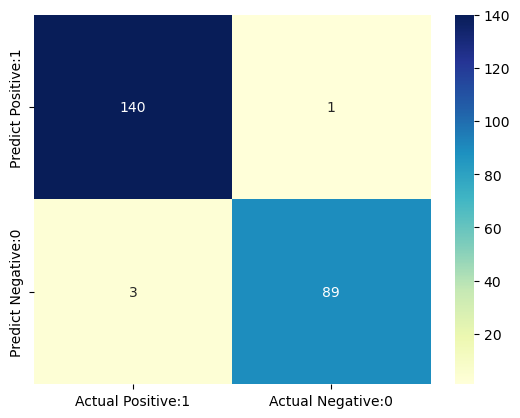

In [16]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       141
           1       0.99      0.97      0.98        92

    accuracy                           0.98       233
   macro avg       0.98      0.98      0.98       233
weighted avg       0.98      0.98      0.98       233



In [18]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9828


In [19]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0172


In [20]:

# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9929


In [21]:
recall = TP / float(TP + FN)                                           # recall metric calculation
print('Recall or Sensitivity : {0:0.4f}'.format(recall))


true_positive_rate = TP / float(TP + FN)                              # true positive rate calculation
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)                             # false positive rate calculation
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)                                         # specificity calaculation
print('Specificity : {0:0.4f}'.format(specificity))


Recall or Sensitivity : 0.9790
True Positive Rate : 0.9790
False Positive Rate : 0.0111
Specificity : 0.9889


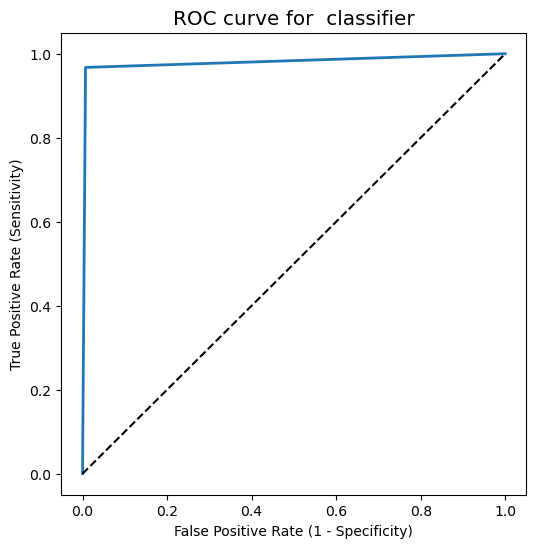

In [22]:
# plot ROC Curve

from sklearn.metrics import roc_curve     # metric variable is imported by sklearn library 

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for  classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


In [23]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score     # import area under the curve calculation

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9801


In [24]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score      # validated with random cv values, by cross_val_score metric

Cross_validated_ROC_AUC = cross_val_score(svc, X_train, y_train, cv=6, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Cross validated ROC AUC : 0.9810
